# Tarea 4 | Análisis de Datos en Python | Magíster en Ciencias de Datos UC
### Luciano Davico

# Desarrollo

Primero importamos los datos

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.cluster import KMeans
from sklearn import preprocessing 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_excel("datos/t4.xlsx", sheet_name="cellphones data")
ratings_df = pd.read_excel("datos/t4.xlsx", sheet_name="cellphones ratings")
users_df = pd.read_excel("datos/t4.xlsx", sheet_name="cellphones users")

In [3]:
data_df

,cellphone_id,brand,model,operating system,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price,release date
0,0,Apple,iPhone SE (2022),iOS,128,4,7.23,12,7,2018,4.7,144,429,2022-03-18
1,1,Apple,iPhone 13 Mini,iOS,128,4,7.72,12,12,2438,5.4,141,699,2021-09-24
2,2,Apple,iPhone 13,iOS,128,4,7.75,12,12,3240,6.1,174,699,2021-09-24
3,3,Apple,iPhone 13 Pro,iOS,256,6,7.94,12,12,3065,6.1,204,999,2021-09-24
4,4,Apple,iPhone 13 Pro Max,iOS,256,6,8.01,12,12,4352,6.7,240,1199,2021-09-24
5,5,Apple,iPhone XR,iOS,64,3,4.22,12,7,2942,6.1,194,236,2018-10-26
6,6,Asus,Zenfone 8,Android,128,8,6.76,64,12,4000,5.9,169,599,2021-05-12
7,7,Samsung,Galaxy A13,Android,32,3,1.36,50,8,5000,6.6,196,154,2022-03-23
8,8,Samsung,Galaxy A32,Android,64,4,2.20,48,13,5000,6.5,205,199,2021-01-22
9,9,Samsung,Galaxy A53,Android,128,6,3.79,64,32,5000,6.5,189,312,2022-03-24


In [4]:
ratings_df

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2
...,...,...,...
985,258,31,5
986,258,17,8
987,258,23,9
988,258,27,8


In [5]:
users_df

,user_id,age,gender,occupation
0,0,38,Female,Data analyst
1,1,40,Female,team worker in it
2,6,55,Female,IT
3,8,25,Female,Manager
4,10,23,Male,worker
...,...,...,...,...
94,254,25,Female,software developer
95,255,25,Male,software developer
96,256,49,Male,Information Technology
97,257,25,Female,Manager


# Pregunta 1
Considere solamente los datos de: internal memory; RAM; performance; main camera; 
selfie camer; y battery size, de los celulares. Utilice el método de agrupación “K-Means” y 
construya 3 agrupaciones de celulares. ¿Qué puede decir sobre los precios de venta de los 
celulares de cada grupo? 

In [28]:
# Consideramos las columnas enunciadas
columns_1 = ['RAM', 'performance', 'main camera', 'selfie camera', 'battery size']
data_df_1 = data_df[columns_1]
data_df_1.head()

,RAM,performance,main camera,selfie camera,battery size
0,4,7.23,12,7,2018
1,4,7.72,12,12,2438
2,4,7.75,12,12,3240
3,6,7.94,12,12,3065
4,6,8.01,12,12,4352


Estandarizamos los datos

In [29]:
min_max_scaler = preprocessing.MinMaxScaler()
scaled_df_1_values = min_max_scaler.fit_transform(data_df_1)
scaled_df_1 = pd.DataFrame(scaled_df_1_values).rename(columns=dict(zip(range(5), columns_1)))
scaled_df_1.head()

,RAM,performance,main camera,selfie camera,battery size
0,0.111111,0.622244,0.0,0.083333,0.000000
1,0.111111,0.671343,0.0,0.222222,0.140704
2,0.111111,0.674349,0.0,0.222222,0.409380
3,0.333333,0.693387,0.0,0.222222,0.350754
4,0.333333,0.700401,0.0,0.222222,0.781910


Procedemos a hacer la agrupación con KMeans y *k=3*

In [30]:
# Entrenamos el modelo
kmeans = KMeans(n_clusters=3).fit(scaled_df_1)

# Calculamos el cluster para cada fila
labels = kmeans.predict(scaled_df_1)
labels

array([1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 1, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 1, 2, 2, 2, 2], dtype=int32)

Finalmente, agregamos una columna indicando el cluster al que pertenece cada fila y la columna de precio. Luego, analizamos dichos precios por cluster.

In [31]:
data_df_1 = pd.concat([data_df_1, data_df[['price']]], axis=1)
data_df_1['cluster'] = labels
data_df_1

,RAM,performance,main camera,selfie camera,battery size,price,cluster
0,4,7.23,12,7,2018,429,1
1,4,7.72,12,12,2438,699,1
2,4,7.75,12,12,3240,699,1
3,6,7.94,12,12,3065,999,1
4,6,8.01,12,12,4352,1199,1
5,3,4.22,12,7,2942,236,1
6,8,6.76,64,12,4000,599,0
7,3,1.36,50,8,5000,154,2
8,4,2.20,48,13,5000,199,2
9,6,3.79,64,32,5000,312,0


Hacemos un filtro por cluster y vemos cada precio

In [45]:
data_df_1_cluster_0 = data_df_1[data_df_1['cluster'] == 0]
data_df_1_cluster_0[['price']].describe()

,price
count,14.000000
mean,642.571429
std,212.874725
min,312.000000
25%,451.000000
50%,633.500000
75%,825.000000
max,987.000000


In [44]:
data_df_1_cluster_1 = data_df_1[data_df_1['cluster'] == 1]
data_df_1_cluster_1[['price']].describe()

,price
count,11.000000
mean,903.090909
std,565.528683
min,236.000000
25%,488.500000
50%,699.000000
75%,1099.000000
max,1998.000000


In [43]:
data_df_1_cluster_2 = data_df_1[data_df_1['cluster'] == 2]
data_df_1_cluster_2[['price']].describe()

,price
count,8.00000
mean,225.37500
std,122.05729
min,129.00000
25%,157.75000
50%,181.50000
75%,224.00000
max,500.00000


Podemos ver que en el cluster 0 se pueden encontrar celulares con un rango de precio entre 312 y 987, teniendo un promedio de 642.57 y desviación estándar de 212.87. Dicho rango de precios se solapa con otros rangos de precio de los clusters, pero si consideramos la mediana y promedio contra los otros 2 clusters, podríamos considerar que son celulares de una gama media.

En segundo lugar, se puede ver que en el cluster 1 encontramos celulares con un rango de precio entre 236 y 1998, teniendo un promedio de 903.09 y desviación estándar de 565.52. En este caso el rango de precios es muy amplio, conteniendo completamente el rango de precios del cluster 0. Sin embargo, podemos ver que tenemos una elevada desviación estándar, por lo que pueden existir valores muy extremos de precios que ensucien el análisis. Con esto, mirando el promedio y la mediana y los estadísticos percentil 25 y 75, se puede ver que en general hay un significativo porcentaje de celulares en el cluster que tiene un precio mayor al cluster 0, por lo que podríamos considerar que en este cluster se encuentran los celulares de gama alta.

En tercer y último lugar, vemos el cluster 2, el cual tiene un rango de precios entre 129 y 500, siendo este rango el más bajo de los tres. Además, el promedio de precios es de 225.37 y la mediana 181.5, con lo que tenemos que dichos estadísticos ya son menores que el límite menor de precios de los otros clusters. Con lo anterior ya podemos afirmar inequívocamente que este cluster contiene los celulares de gama baja.

Vale decir que puede ser aconsejable incorporar más variables a la clusterización, además de probar con una mayor cantidad de clusters, o bien, desglosar el cluster 1, debido a que existe una alta dispersión en sus datos. Podríamos estar ante una situación de *underfitting*.

# Respuesta

# Pregunta 2
Calcule la correlación (bivariada) entre el precio y todas las variables cuantitativas con 
información sobre los celulares. ¿Cuáles son las 3 variables que presentan una mayor 
correlación con el precio? 

# Respuesta

Definimos todas las variables cuantitativas de los celulares

In [48]:
columns_2 = ['internal memory', 'RAM', 'performance', 'main camera', 'selfie camera', 'battery size', 'screen size', 'weight', 'price']
data_df_2 = data_df[columns_2]
data_df_2.head()

,internal memory,RAM,performance,main camera,selfie camera,battery size,screen size,weight,price
0,128,4,7.23,12,7,2018,4.7,144,429
1,128,4,7.72,12,12,2438,5.4,141,699
2,128,4,7.75,12,12,3240,6.1,174,699
3,256,6,7.94,12,12,3065,6.1,204,999
4,256,6,8.01,12,12,4352,6.7,240,1199


<Axes: >

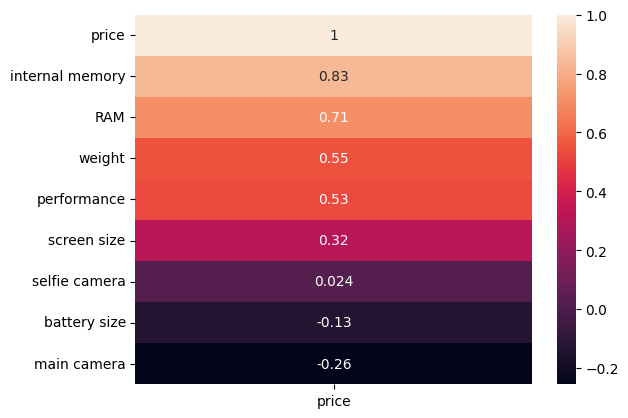

In [59]:
corr_2_price = data_df_2.corr()[['price']].sort_values(by='price', ascending=False)
sns.heatmap(corr_2_price, annot=True)

Las variables que presentan mayor correlación contra el precio son: **internal memory**, **RAM** y **weight**; siendo los valores: 0.83, 0.71 y 0.55, respectivamente.

# Pregunta 3
Construya una regresión multivariada entre precio y las 3 variables determinadas en la parte 
(2). Utilice un 20% de los datos para testear.

# Respuesta

Construimos los datos, los set de entrenamiento y de test.

In [68]:
columns_3 = ['internal memory', 'RAM', 'weight']
X = data_df[columns_3].values
y = data_df[['price']].values

# Construimos el set de entrenamiento y test con una proporción 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Construimos la regresión lineal

In [69]:
reg = LinearRegression().fit(X_train, y_train)
y_train_pred = reg.predict(X_train)

print('Training score (R^2): ', reg.score(X_train, y_train))
print('Training RMSE: ', mean_squared_error(y_train, y_train_pred))

Training score (R^2):  0.7945296960902768
Training RMSE:  44118.13624086952


Construimos una columna del precio predicho para el set de entrenamiento como el set de test

In [78]:
df_3_train = pd.DataFrame(X_train).rename(columns=dict(zip(range(3), columns_3)))
df_3_train['price'] = y_train
df_3_train['price_predicted'] = y_train_pred
df_3_train

,internal memory,RAM,weight,price,price_predicted
0,128,8,195,899,601.734365
1,128,8,190,379,585.563712
2,256,6,240,1199,1058.488780
3,32,3,196,154,162.171269
4,32,3,188,129,136.298224
5,256,12,218,987,1180.614820
6,256,6,204,999,942.060080
7,256,12,271,1799,1352.023740
8,512,12,225,1998,1954.542089
9,128,8,169,599,517.646970


In [79]:
df_3_test = pd.DataFrame(X_test).rename(columns=dict(zip(range(3), columns_3)))
df_3_test['price'] = y_test
df_3_test['price_predicted'] = reg.predict(X_test)
df_3_test

,internal memory,RAM,weight,price,price_predicted
0,128,8,183,899,562.924798
1,128,8,228,840,708.460673
2,128,6,215,500,601.991339
3,128,8,195,428,601.734365
4,128,6,189,312,517.903944
5,128,4,144,429,307.942431
6,128,6,173,299,466.157855


# Pregunta 4
Construya una agrupación, utilizando K-Means, considerando ranking promedio (puesto por 
el comprador), edad y sexo. Escoja, con el método del codo, la cantidad de grupos. ¿Qué 
puede decir de las similitudes o diferencias intra e inter grupos? 

# Respuesta

Lo primero que hacemos es construir el ranking promedio por usuario, es decir, el promedio de notas que calcula cada usuario.

In [88]:
ratings_df

,user_id,cellphone_id,rating
0,0,30,1
1,0,5,3
2,0,10,9
3,0,9,3
4,0,23,2
...,...,...,...
985,258,31,5
986,258,17,8
987,258,23,9
988,258,27,8


In [84]:
mean_ratings_df = ratings_df.groupby('user_id').agg('mean').reset_index()[['user_id', 'rating']]
mean_ratings_df

,user_id,rating
0,0,3.4
1,1,7.4
2,6,5.5
3,8,7.1
4,10,7.9
...,...,...
94,254,7.5
95,255,10.0
96,256,7.3
97,257,7.0


Ahora que ya tenemos el rating promedio por usuario, cruzamos este dataframe con el de información del usuario para construir el dataset que necesitamos

In [97]:
columns_4 = ['rating', 'age', 'gender']
df_4 = users_df.merge(mean_ratings_df, how='inner', on='user_id')[columns_4]
df_4

,rating,age,gender
0,3.4,38,Female
1,7.4,40,Female
2,5.5,55,Female
3,7.1,25,Female
4,7.9,23,Male
...,...,...,...
94,7.5,25,Female
95,10.0,25,Male
96,7.3,49,Male
97,7.0,25,Female


Dado que vamos a trabajar con distancias para la clusterización, transformamos la columna gender a binario

In [98]:
df_4['gender'] = df_4['gender'].map({'Female': 1, 'Male': 0})
df_4

,rating,age,gender
0,3.4,38,1
1,7.4,40,1
2,5.5,55,1
3,7.1,25,1
4,7.9,23,0
...,...,...,...
94,7.5,25,1
95,10.0,25,0
96,7.3,49,0
97,7.0,25,1


Procedemos a construir clusters con distinta cantidad de centroides y evaluamos por método del codo la mejor configuración de hiperparámetros.

In [103]:
# Escalamos los datos
min_max_scaler = preprocessing.MinMaxScaler() 
scaled_df_4 = min_max_scaler.fit_transform(df_4)
scaled_df_4 = pd.DataFrame(scaled_df_4)
scaled_df_4 = scaled_df_4.rename(columns = dict(zip(range(3), columns_4))) 
scaled_df_4.head()

,rating,age,gender
0,0.083333,0.425,1.0
1,0.638889,0.475,1.0
2,0.375000,0.850,1.0
3,0.597222,0.100,1.0
4,0.708333,0.050,0.0


Probamos con 1 a 10 centroides y revisamos por método del codo el mejor score

,rating,age,gender
0,0.083333,0.425,1.0
1,0.638889,0.475,1.0
2,0.375000,0.850,1.0
3,0.597222,0.100,1.0
4,0.708333,0.050,0.0


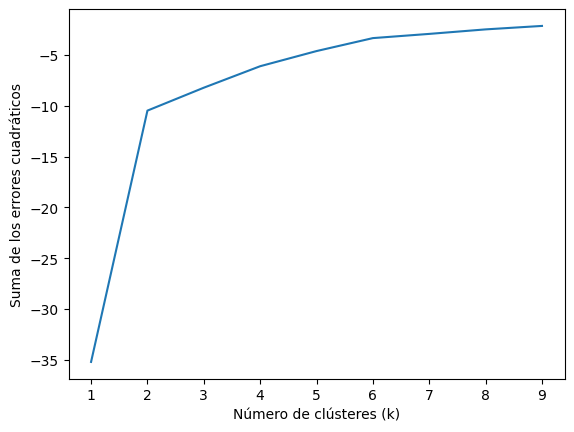

In [104]:
nc = range(1, 10) 
kmeans = [KMeans(n_clusters=i) for i in nc]
score = [kmeans[i].fit(scaled_df_4).score(scaled_df_4) for i in range(len(kmeans))]
score
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Suma de los errores cuadráticos')
plt.plot(nc,score)
scaled_df_4.head()

Es fácil ver que la cantidad de clústeres óptima es 2, dado que la pendiente de la recta que representa la suma de los errores cuadráticos comienza a decrecer más bruscamente desde dicho valor. Nos quedamos con *k=2*

In [115]:
k = 2
kmeans_4 = KMeans(n_clusters=k).fit(scaled_df_4)

# Calculamos el cluster para cada fila
labels_4 = kmeans_4.predict(scaled_df_4)
labels_4

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int32)

Agregamos el cluster al dataset inicial con el que contábamos

In [112]:
df_4['gender'] = df_4['gender'].map({1: 'Female', 0: 'Male'})
df_4['cluster'] = labels_4
df_4

,rating,age,gender,cluster
0,3.4,38,Female,1
1,7.4,40,Female,1
2,5.5,55,Female,1
3,7.1,25,Female,1
4,7.9,23,Male,0
...,...,...,...,...
94,7.5,25,Female,1
95,10.0,25,Male,0
96,7.3,49,Male,0
97,7.0,25,Female,1


Graficamos los clusters

In [114]:
scaled_df_4['cluster'] = labels_4
scaled_df_4

,rating,age,gender,cluster
0,0.083333,0.425,1.0,1
1,0.638889,0.475,1.0,1
2,0.375000,0.850,1.0,1
3,0.597222,0.100,1.0,1
4,0.708333,0.050,0.0,0
...,...,...,...,...
94,0.652778,0.100,1.0,1
95,1.000000,0.100,0.0,0
96,0.625000,0.700,0.0,0
97,0.583333,0.100,1.0,1


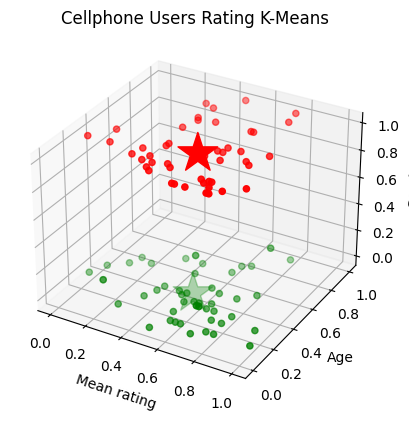

In [116]:
colors = ['red','green']
assign = [colors[row] for row in labels_4]
x = scaled_df_4['rating']
y = scaled_df_4['age']
z = scaled_df_4['gender']

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, c=assign)

# Definimos los centroides
centroids = kmeans_4.cluster_centers_
ax.scatter3D(centroids[:, 0], centroids[:, 1],centroids[:, 2], marker = '*',c=['red','green'], 
            s=900)
ax.set_xlabel("Mean rating")
ax.set_ylabel("Age")
ax.set_zlabel("Gender")
plt.title('Cellphone Users Rating K-Means')
plt.show()

# Análisis clusters

La comparación más evidente que podemos notar es que ambos clusters están divididos por género en un cien por ciento. Es decir, podemos ver que el cluster 0 agrupa a todos los hombres y el cluster 1 a todas las mujeres. Dicho lo anterior, se puede ver que la categoría 'gender' parece predominar en la clasificación. Si ingresáramos un nuevo dato a nuestro modelo de kmeans, podríamos solo preguntar por el género y ya sabríamos con precisión el cluster al cual pertenecería.

### Análisis intragrupo cluster 0

Dicho lo anterior, no vale mucho la pena analizar la variable de género, ya que sabemos que es homogénea por cluster.

In [125]:
df_4_cluster_0 = df_4[df_4['cluster'] == 0]
df_4_cluster_0.head()

,rating,age,gender,cluster
4,7.9,23,Male,0
13,6.4,34,Male,0
14,3.7,39,Male,0
16,4.4,41,Male,0
17,3.9,42,Male,0


In [126]:
df_4_cluster_0.describe()

,rating,age,cluster
count,52.000000,52.000000,52.0
mean,6.696154,35.538462,0.0
std,1.658603,9.036878,0.0
min,2.800000,21.000000,0.0
25%,5.575000,30.000000,0.0
50%,7.150000,33.000000,0.0
75%,7.600000,41.000000,0.0
max,10.000000,58.000000,0.0


Se puede ver estadísticamente que en *rating*, el promedio de este para los hombres es de 6.69 con un mínimo de 2.8 y máximo de 10. El intervalo es amplio, sin embargo vemos que la desviación estándar es 1.65 y entre el percentil 25 y 75 solo varían dos puntos, por lo que vemos que en promedio de ranking tenemos bastante homogeneidad.

Respecto a edad, se puede considerar que tenemos un promedio de edad de 35.5 años, con una desviación estándar de 9 años y un mínimo y máximo de edad de 21 y 58, respectivamente. De igual manera, se puede ver que la edad entre el percentil 25 y 75 es entre 30 y 41 años, por lo que podríamos considerar que la población más significativa tiene entre 30 y 40 años.

### Análisis intragrupo cluster 1

Analizamos el segundo cluster, entendiendo que el género se mantiene constante (Female).

In [124]:
df_4_cluster_1 = df_4[df_4['cluster'] == 1]
df_4_cluster_1.head()

,rating,age,gender,cluster
0,3.4,38,Female,1
1,7.4,40,Female,1
2,5.5,55,Female,1
3,7.1,25,Female,1
5,5.7,28,Female,1


In [128]:
df_4_cluster_1.describe()

,rating,age,cluster
count,47.000000,47.000000,47.0
mean,6.704255,37.340426,1.0
std,1.530694,10.357263,0.0
min,2.800000,25.000000,1.0
25%,5.500000,29.000000,1.0
50%,7.000000,37.000000,1.0
75%,7.950000,42.500000,1.0
max,9.300000,61.000000,1.0


Se puede ver estadísticamente que en *rating*, el promedio de este para las mujeres es de 6.70 (casi igual que los hombres) con un mínimo de 2.8 y máximo de 9.3. El intervalo también es amplio, con una desviación estándar de 1.53. Entre el percentil 25 y 75 varía en casi 2 puntos, por lo que vemos que en promedio de ranking tenemos bastante homogeneidad, al igual que el caso del cluster 0.

Respecto a edad, se puede considerar que tenemos un promedio de edad de 37.3 años, con una desviación estándar de 10.3 años y un mínimo y máximo de edad de 25 y 61, respectivamente. De igual manera, se puede ver que la edad entre el percentil 25 y 75 es entre 29 y 43 años, por lo que podríamos considerar que la población más significativa tiene entre 30 y 40 años, similar al caso del cluster 0.

## Análisis inter cluster

Dado el análisis intra cluster, podemos ver que en general la distribución de los datos es similar para ambos cluster, y estos en realidad están separados únicamente por género. Dado lo anterior, es posible afirmar que en la clusterización se podría omitir dicha variable, dado que estamos en la práctica solo segmentando los datos por una sola categoría que no permite encontrar diferencias significativas del comportamiento de los datos entre diferentes clusters. 

Graficamos un boxplot que nos permita ver para cada variable sus estadísticos y así verificar lo que comentamos, sobre la homogeneidad de ambos clusters.

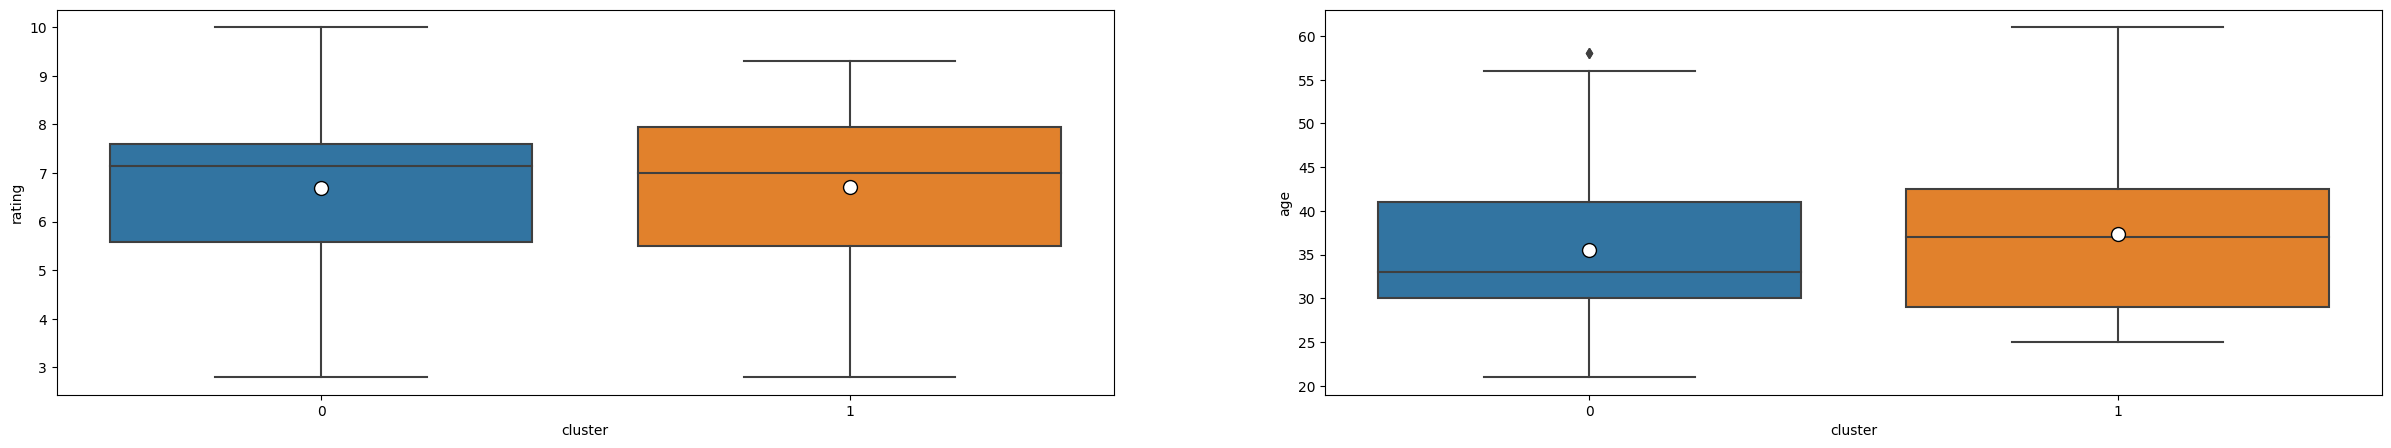

In [131]:
fig = plt.figure(figsize=(30,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1_box = sns.boxplot(df_4, x='cluster', y='rating', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, ax=ax1)

ax2_box = sns.boxplot(df_4, x='cluster', y='age', showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"}, ax=ax2)

plt.show()